<a href="https://colab.research.google.com/github/20f20785/-AL-RAHBI-MPA-COMP-30044/blob/main/20F20785%2CAHMED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(i) Business Understanding
my aim to estimate laptop prices based on their specifications (e.g., CPU, RAM, GPU, display size). This is a regression problem, where the target variable is price.

Goal: Predict the price of laptops based on technical specifications.
Why: This helps users or sellers estimate a fair market price based on features like RAM, CPU, display, etc.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats

# Load dataset
df = pd.read_csv("/content/dataset.laptop.csv")

Understand RAM and ROM Units
onvert RAM/ROM from "GB"/"TB" strings to numeric values for analysis.

In [ ]:
def convert_storage(val):
    val = str(val).upper().strip()
    if 'TB' in val:
        return int(float(val.replace('TB', '')) * 1000)
    elif 'GB' in val:
        return int(val.replace('GB', ''))
    else:
        return np.nan

df['Ram'] = df['Ram'].apply(convert_storage)
df['ROM'] = df['ROM'].apply(convert_storage)


Drop Irrelevant Columns
I drop name and CPU because they’re high-cardinality or redundant.

In [ ]:
df.drop(columns=['name', 'CPU'], inplace=True)


Encode Categorical Features
Label encoding turns categorical text into numeric codes for modeling.

In [ ]:
cat_cols = ['brand', 'processor', 'Ram_type', 'ROM_type', 'GPU', 'OS']
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])


 Drop Missing Values
Any errors or unknown values in previous steps are removed.

In [ ]:
df.dropna(inplace=True)


In [ ]:
# Show basic info
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 893 entries, 0 to 892
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              893 non-null    int64  
 1   spec_rating        893 non-null    float64
 2   processor          893 non-null    int64  
 3   Ram                893 non-null    int64  
 4   Ram_type           893 non-null    int64  
 5   ROM                893 non-null    int64  
 6   ROM_type           893 non-null    int64  
 7   GPU                893 non-null    int64  
 8   display_size       893 non-null    float64
 9   resolution_width   893 non-null    int64  
 10  resolution_height  893 non-null    int64  
 11  OS                 893 non-null    int64  
 12  warranty           893 non-null    int64  
 13  price              893 non-null    int64  
dtypes: float64(2), int64(12)
memory usage: 97.8 KB
None
            brand  spec_rating   processor         Ram    Ram_type  \


Exploratory Data Analysis (EDA)
Heatmap of Correlations

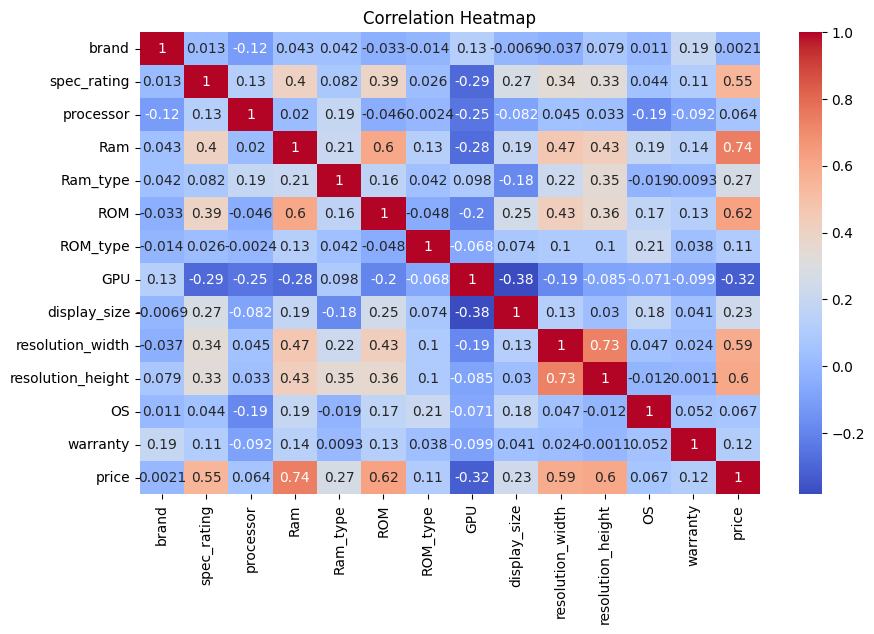

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


Boxplot of Price by Brand

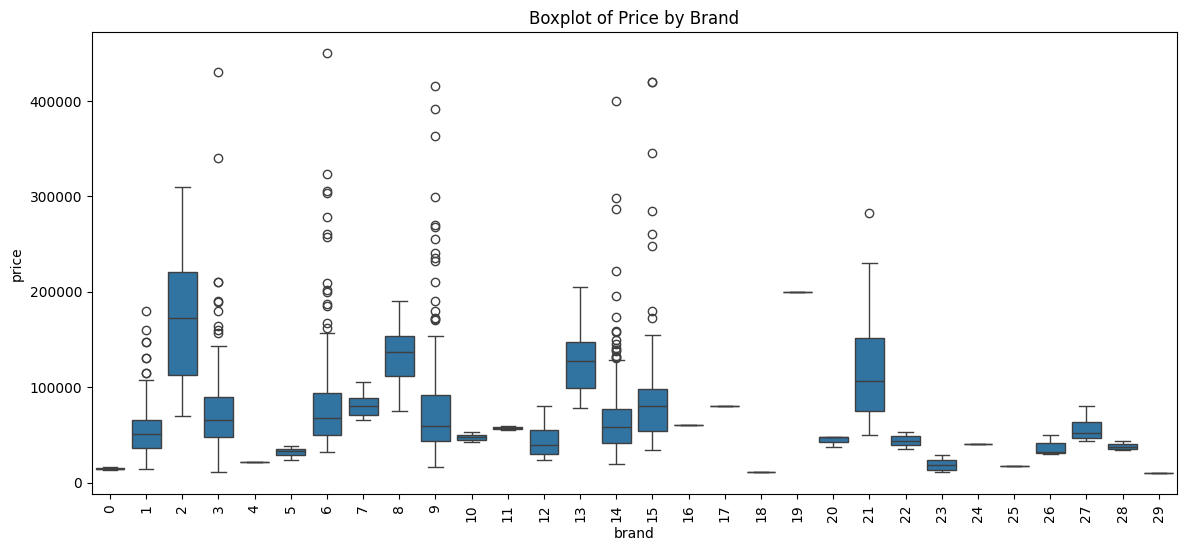

In [ ]:
plt.figure(figsize=(14,6))
sns.boxplot(x='brand', y='price', data=df)
plt.xticks(rotation=90)
plt.title("Boxplot of Price by Brand")
plt.show()


Regression Plot: Display Size vs Price


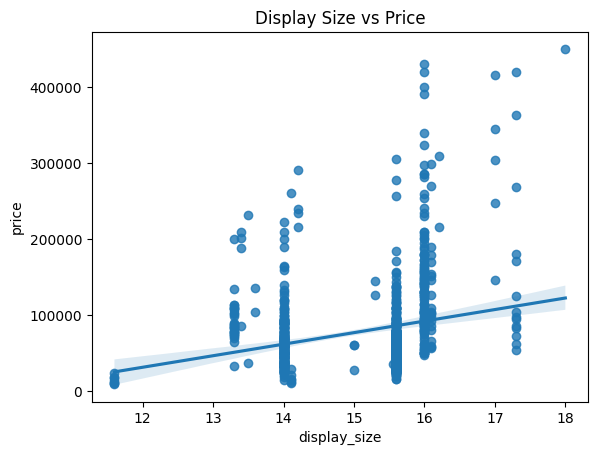

In [ ]:
sns.regplot(x='display_size', y='price', data=df)
plt.title("Display Size vs Price")
plt.show()


Pearson Correlation with P-values

In [ ]:
def calculate_pearson_pvals(data):
    numeric_df = data.select_dtypes(include=[np.number])
    pvals = pd.DataFrame(np.ones((numeric_df.shape[1], numeric_df.shape[1])), columns=numeric_df.columns, index=numeric_df.columns)
    for i in numeric_df.columns:
        for j in numeric_df.columns:
            if i != j:
                _, pval = stats.pearsonr(numeric_df[i], numeric_df[j])
                pvals.loc[i, j] = pval
    return pvals

print("Pearson p-values:\n", calculate_pearson_pvals(df))


Pearson p-values:
                           brand   spec_rating     processor            Ram  \
brand              1.000000e+00  7.021481e-01  4.678899e-04   2.004355e-01   
spec_rating        7.021481e-01  1.000000e+00  1.032941e-04   3.520619e-36   
processor          4.678899e-04  1.032941e-04  1.000000e+00   5.418700e-01   
Ram                2.004355e-01  3.520619e-36  5.418700e-01   1.000000e+00   
Ram_type           2.063452e-01  1.374843e-02  7.026243e-09   2.042813e-10   
ROM                3.314451e-01  2.209989e-34  1.665968e-01   3.019402e-90   
ROM_type           6.867898e-01  4.397623e-01  9.439929e-01   1.224502e-04   
GPU                1.128505e-04  1.036532e-18  3.393535e-14   4.347769e-17   
display_size       8.364607e-01  7.238784e-17  1.455180e-02   1.473266e-08   
resolution_width   2.670347e-01  2.984930e-25  1.770293e-01   7.863658e-50   
resolution_height  1.819946e-02  6.447427e-24  3.182558e-01   8.085456e-41   
OS                 7.536653e-01  1.844902e-01

 (iii) Data Preparation

 Normalize Data
This ensures all features are in the same range (0 to 1), which helps many models.

In [ ]:
scaler = MinMaxScaler()
df[df.columns] = scaler.fit_transform(df[df.columns])


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 893 entries, 0 to 892
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              893 non-null    float64
 1   spec_rating        893 non-null    float64
 2   processor          893 non-null    float64
 3   Ram                893 non-null    float64
 4   Ram_type           893 non-null    float64
 5   ROM                893 non-null    float64
 6   ROM_type           893 non-null    float64
 7   GPU                893 non-null    float64
 8   display_size       893 non-null    float64
 9   resolution_width   893 non-null    float64
 10  resolution_height  893 non-null    float64
 11  OS                 893 non-null    float64
 12  warranty           893 non-null    float64
 13  price              893 non-null    float64
dtypes: float64(14)
memory usage: 97.8 KB
None


Split Data for Training and Testing
I split 80% for training and 20% for testing model accuracy.

In [ ]:
X = df.drop(columns=['price'])
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


(iv) Modeling
Model 1: Linear Regression

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)


Model 2: Random Forest Regressor

In [ ]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)


(v) Evaluation


Compare Models: RMSE & R² Score

In [ ]:
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_preds))
lr_r2 = r2_score(y_test, lr_preds)

rf_rmse = np.sqrt(mean_squared_error(y_test, rf_preds))
rf_r2 = r2_score(y_test, rf_preds)

print(f"Linear Regression - RMSE: {lr_rmse:.4f}, R2: {lr_r2:.4f}")
print(f"Random Forest      - RMSE: {rf_rmse:.4f}, R2: {rf_r2:.4f}")


Linear Regression - RMSE: 0.0657, R2: 0.7564
Random Forest      - RMSE: 0.0485, R2: 0.8669


Basic Model Deployment UI

In [ ]:
# 1. Encode categorical variables
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
cat_cols = ['brand', 'processor', 'Ram_type', 'ROM_type', 'GPU', 'OS']
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save encoders for deployment

In [ ]:
df = pd.read_csv("/content/dataset.laptop.csv")

In [ ]:
# Convert RAM and ROM values like '8GB' or '1TB' to numeric values
def convert_storage(val):
    val = str(val).upper().strip()
    if 'TB' in val:
        return int(float(val.replace('TB', '')) * 1000)
    elif 'GB' in val:
        return int(val.replace('GB', ''))
    else:
        return None  # or np.nan for safety

df['Ram'] = df['Ram'].apply(convert_storage)
df['ROM'] = df['ROM'].apply(convert_storage)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_cols = ['spec_rating', 'Ram', 'ROM', 'display_size', 'resolution_width', 'resolution_height', 'warranty']
df[num_cols] = scaler.fit_transform(df[num_cols])


In [ ]:
# 3. Prepare features and target
X = df.drop(['price', 'name', 'CPU'], axis=1)
y = df['price']


In [ ]:
# 4. Split data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# 5. Train model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
# 6. Save model and tools using joblib
import joblib

joblib.dump(model, "rf_model.joblib")
joblib.dump(label_encoders, "label_encoders.joblib")
joblib.dump(scaler, "scaler.joblib")


['scaler.joblib']

In [ ]:
# 7. (Optional) Download model in Google Colab
from google.colab import files

files.download("rf_model.joblib")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
def convert_storage(val):
    val = str(val).upper().strip()
    if "TB" in val:
        return int(float(val.replace("TB", "")) * 1000)
    elif "GB" in val:
        return int(val.replace("GB", ""))
    else:
        return None

df["Ram"] = df["Ram"].apply(convert_storage)
df["ROM"] = df["ROM"].apply(convert_storage)


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Define the columns to encode
categorical_columns = ['brand', 'processor', 'Ram_type', 'ROM_type', 'GPU', 'OS']

label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [ ]:
from google.colab import files
files.download("label_encoders.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import joblib

# Load your dataset
df = pd.read_csv("dataset.laptop.csv")

# Convert RAM and ROM from '8GB', '1TB' etc.
def convert_storage(val):
    val = str(val).upper().strip()
    if "TB" in val:
        return int(float(val.replace("TB", "")) * 1000)
    elif "GB" in val:
        return int(val.replace("GB", ""))
    else:
        return None

df["Ram"] = df["Ram"].apply(convert_storage)
df["ROM"] = df["ROM"].apply(convert_storage)

# Encode categorical features
from sklearn.preprocessing import LabelEncoder
categorical_columns = ['brand', 'processor', 'Ram_type', 'ROM_type', 'GPU', 'OS']
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# ✅ Define the exact 13 features you use in your Streamlit app
feature_columns = [
    'brand', 'processor', 'Ram', 'Ram_type', 'ROM', 'ROM_type', 'GPU',
    'display_size', 'resolution_width', 'resolution_height', 'OS', 'warranty', 'spec_rating'
]

# Fit and save the scaler
scaler = MinMaxScaler()
scaler.fit(df[feature_columns])  # MUST match app.py order

# Save scaler and encoders
joblib.dump(scaler, "scaler.pkl")
joblib.dump(label_encoders, "label_encoders.pkl")



['label_encoders.pkl']

In [ ]:
from google.colab import files
files.download("label_encoders.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
files.download("scaler.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>